In [1]:
from typing import Any, Callable, List
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import ArrayLike, NDArray
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
# Gussian Kernel
class GaussianKernel():
    def kernel_function(self, h, x1, x2):
        power = -(np.linalg.norm(x1-x2)/h)**2
        return  1/(h*np.sqrt(np.pi*2)) * (np.e**(power/2))
# Epanechnikov Kernel
class EpanechnikovKernel():
    def kernel_function(self, h, ker_x, xi)->Any:
        u = np.linalg.norm(xi - ker_x) / h
        k = (3/4) * (1-u**2)
        return k/h if np.abs(u)<=1 else 0.000000001
    
# Squared Exponential Kernel 
class SquaredExponentialKernel():
    def kernel_function(self, h, ker_x, xi)->Any:
        u = np.linalg.norm(xi - ker_x) / h
        k = np.exp(-1 * (u**2) / 2)
        return k/h
# Logistic Kernel
class LogisticKernel():
    def kernel_function(self, h, ker_x, xi)->Any:
        u = np.linalg.norm(xi - ker_x) / h
        k = 1 / (np.exp(u) + 2 + np.exp(-u))
        return k/h
# Cosin Kernel
class CosinKernel():
    def kernel_function(self, h, ker_x, xi)->Any:
        u = np.linalg.norm(xi - ker_x) / h
        k = (np.pi/4) * np.cos(np.pi * u / 2)
        return k / h
    

In [3]:
# Kernel Regression
# Based on NadaryaWatson
class KernelRegression():
    # dim (example: if equals to one == only one feature)
    dim : int = 1
    
    # Training Data
    xTrainData : NDArray
    yTrainData : NDArray
    # Test Data
    xTest: NDArray
    yTest: NDArray
    
    # Exceptation
    Expectation : List
    # Test function Expectation
    predictExpectation: List
    
    # Kernel Class
    kernel: Callable
    H: int = 1
    
    
    def __init__(self, **kwargs) -> None:
        # Get Kwargs
        self.xTrainData = kwargs['xTrain']
        self.yTrainData = kwargs['yTrain']
        
        self.xTest = kwargs['xTest'] if 'xTest' in kwargs else np.array([])
        self.yTest = kwargs['yTest'] if 'yTest' in kwargs else np.array([])
        
        self.dim = kwargs['dim'] if 'dim' in kwargs else 1
        self.H = kwargs['H'] if 'H' in kwargs else 1
        
        self.Expectation = [0 for _ in range(len(self.xTrainData))]
        self.kernel = kwargs['kernel'] if 'kernel' in kwargs else GaussianKernel().kernel_function
    
    
    def fit(self):
        # Fit data Using NadaryaWatson
        E = []
        # sigma Operator
        for x in self.xTrainData:
            result1 = 0
            for index in range(len(self.xTrainData)):
                result1 += self.weight(x, self.xTrainData[index])*self.yTrainData[index]
            E.append(result1)
        self.Expectation = E
        return self.Expectation
    
    def predict(self):
        E = []
        for x in self.xTest:
            res = 0
            for index in range(self.xTrainData.shape[0]):
                res += self.weight(x, self.xTrainData[index]) * self.yTrainData[index]
            E.append(res)
        self.predictExpectation = E
        return self.predictExpectation
                
    # Calculating Weights
    def weight(self, x, xi):
        numerator = self.kernel(self.H, x, xi)
        denominator = 0
        # sigma Operator
        for xj in self.xTrainData:
            denominator += self.kernel(self.H, x, xj)
        return numerator/denominator
    
    
    
    def plotting(self, pltObj=plt, show=True):
        # Plot the results
        pltObj.figure(figsize=(6,6))
        pltObj.scatter(self.xTrainData, self.yTrainData, marker = '^', color='b', label = 'train data', zorder=10)
        pltObj.plot(self.xTrainData, self.Expectation, color='b', label = 'kernel regression', zorder=1)
        pltObj.scatter(self.xTest, self.predictExpectation, marker = '*', color='r', label = 'test prediction',zorder=20)
        pltObj.scatter(self.xTest, self.yTest, color='g', label = 'test', zorder=30)
        if show :
            pltObj.legend() 
            pltObj.show()
        return pltObj
    
    def accuracy(self):
        return mean_squared_error(self.yTest, self.predictExpectation)



In [21]:
# data prepration
def forexHis(numbersOfData):
    df = pd.read_csv('csv.csv')
    df = df.to_numpy()
    df = df[len(df)-numbersOfData:len(df)]
    df = df.transpose()
    df = df[1]
    df = df.transpose()
    x = np.array([i for i in range(len(df))])
    return x, df




LogisticKernel


C:\Users\top\AppData\Local\Temp\ipykernel_17952\109073211.py:23: RuntimeWarning: overflow encountered in exp
  k = 1 / (np.exp(u) + 2 + np.exp(-u))


H=0.1 -> MSE:2.9090499933436644e-09
H=1.1 -> MSE:2.4952913351540858e-09
H=2.1 -> MSE:3.0424866432112055e-09
H=3.1 -> MSE:4.281342600579053e-09
H=4.1 -> MSE:5.624177236127508e-09
H=5.1 -> MSE:6.846579949828268e-09
H=6.1 -> MSE:7.897489119366043e-09
H=7.1 -> MSE:8.795928024242313e-09
H=8.1 -> MSE:9.584160786498005e-09
H=9.1 -> MSE:1.0301747995622824e-08


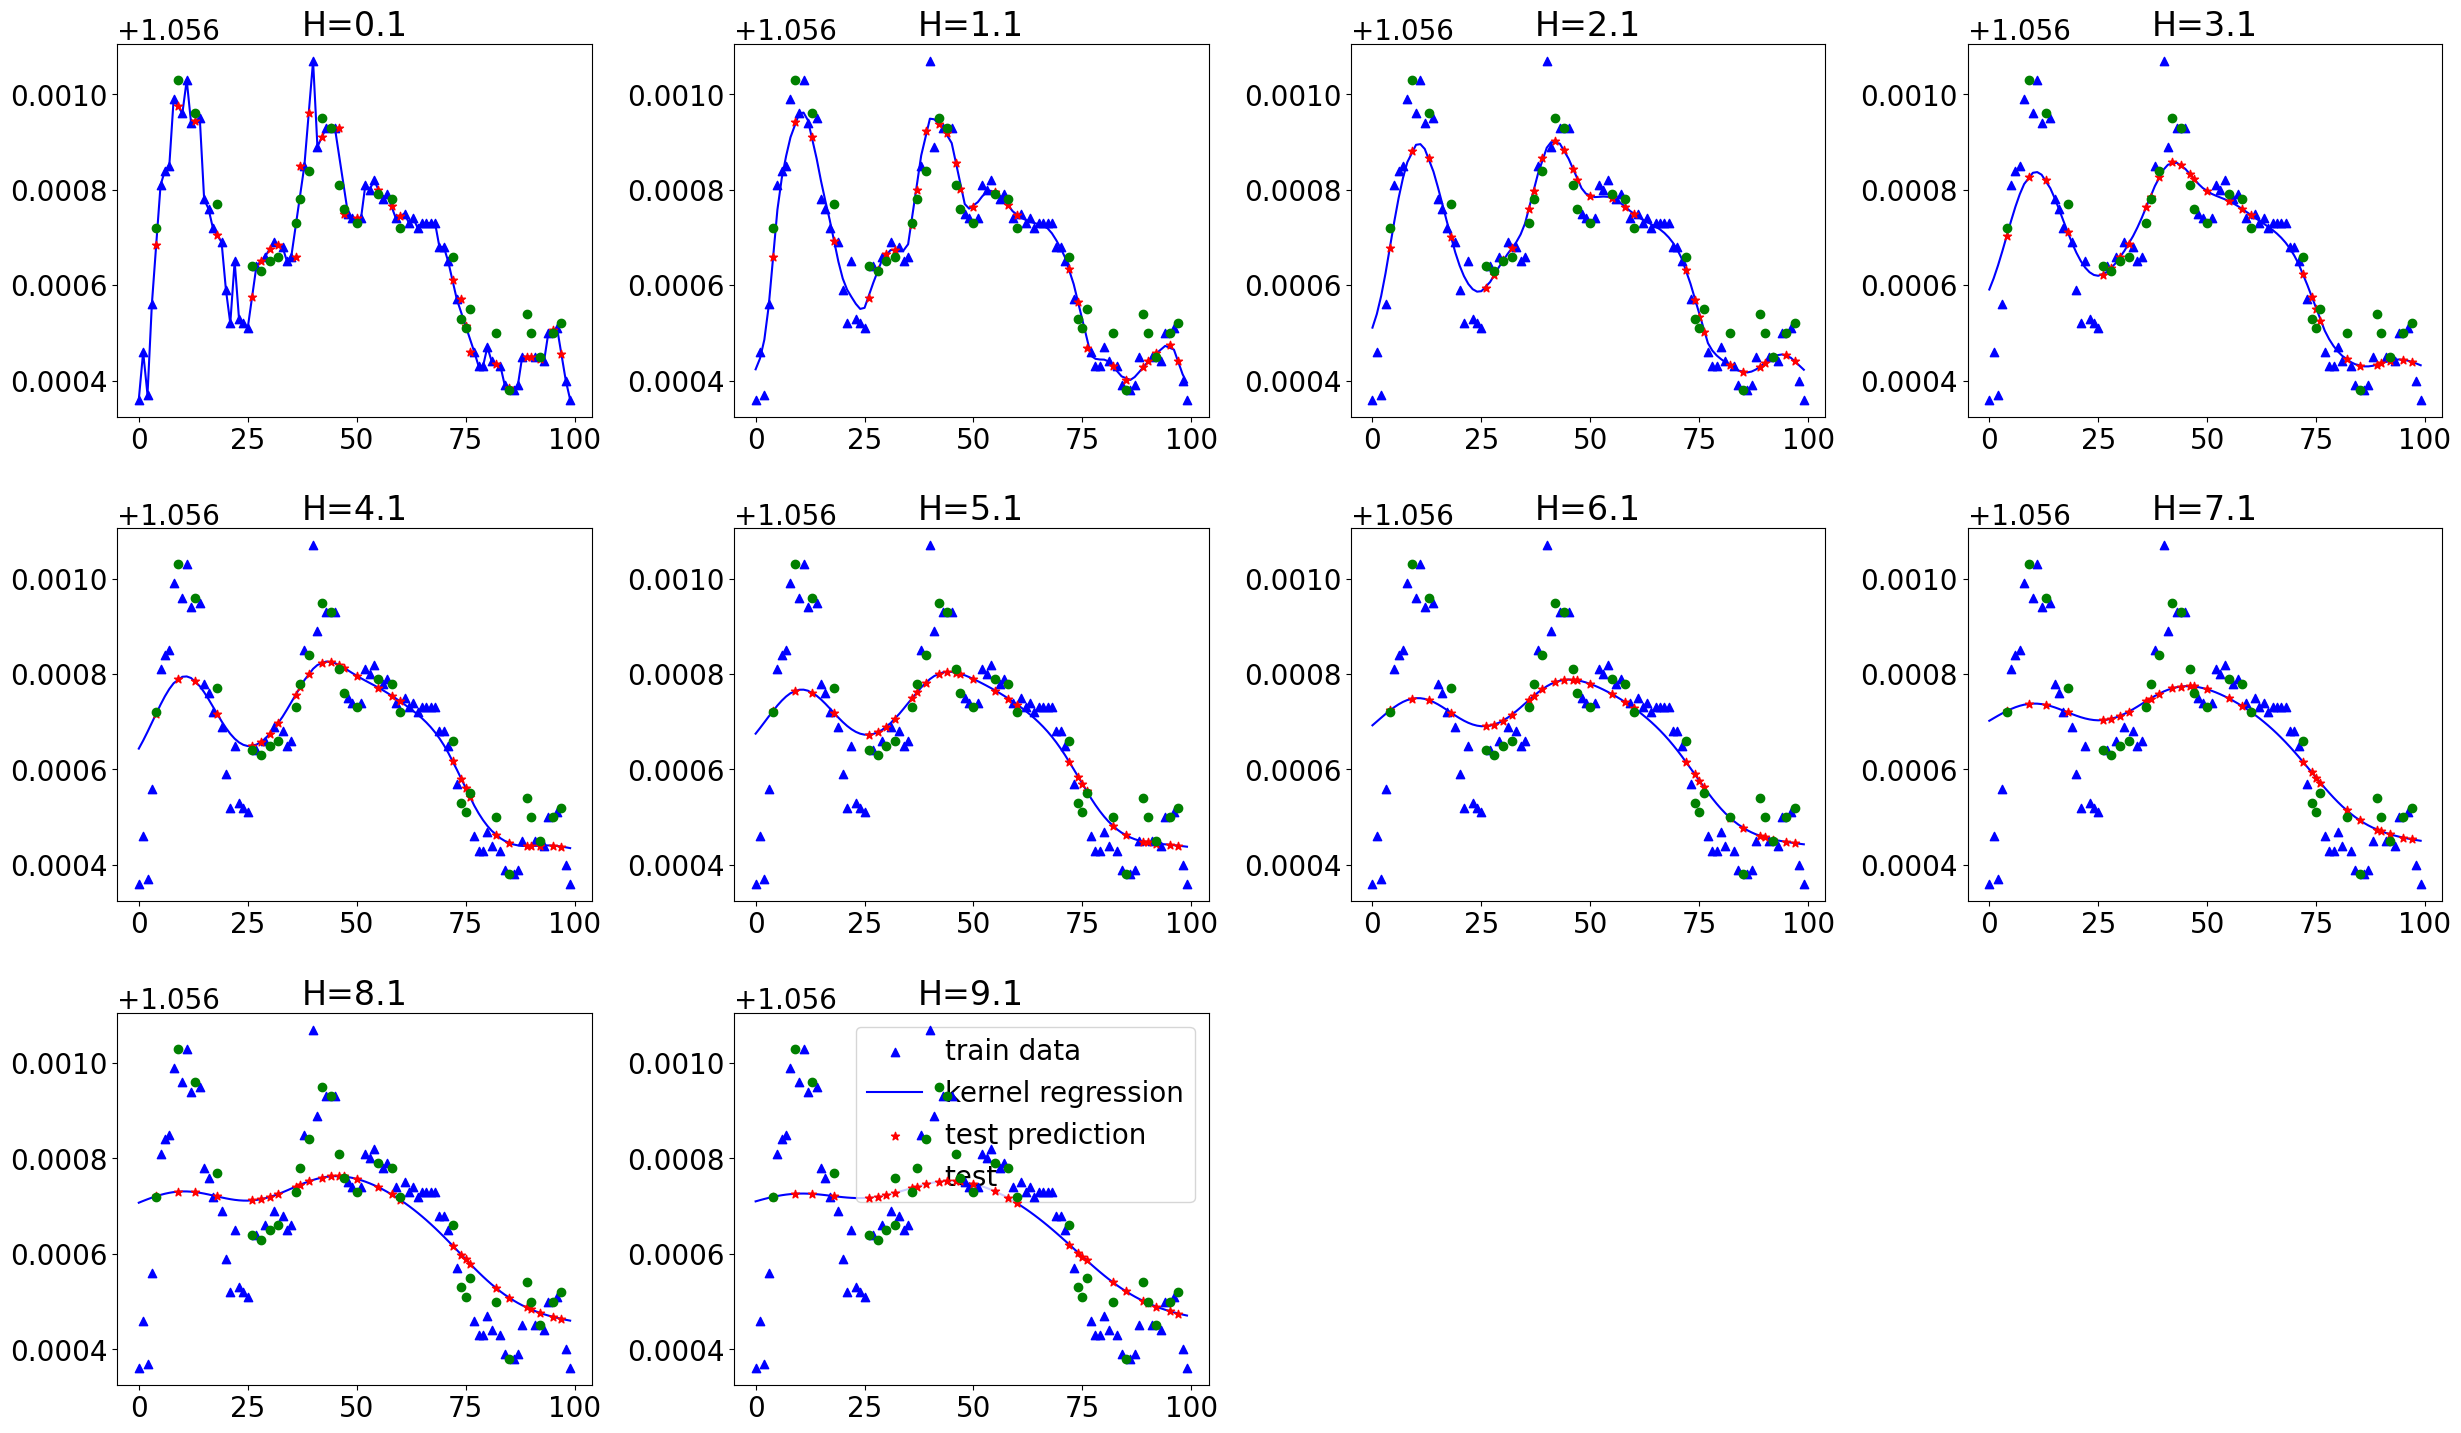

GaussianKernel
H=0.1 -> MSE:2.9091666666669614e-09
H=1.1 -> MSE:2.581479991950033e-09
H=2.1 -> MSE:2.5336012270576585e-09
H=3.1 -> MSE:2.777120698025862e-09
H=4.1 -> MSE:3.46781324710553e-09
H=5.1 -> MSE:4.3442327727399664e-09
H=6.1 -> MSE:5.238987980921481e-09
H=7.1 -> MSE:6.106862564509566e-09
H=8.1 -> MSE:6.9267775746236605e-09
H=9.1 -> MSE:7.675548239364832e-09


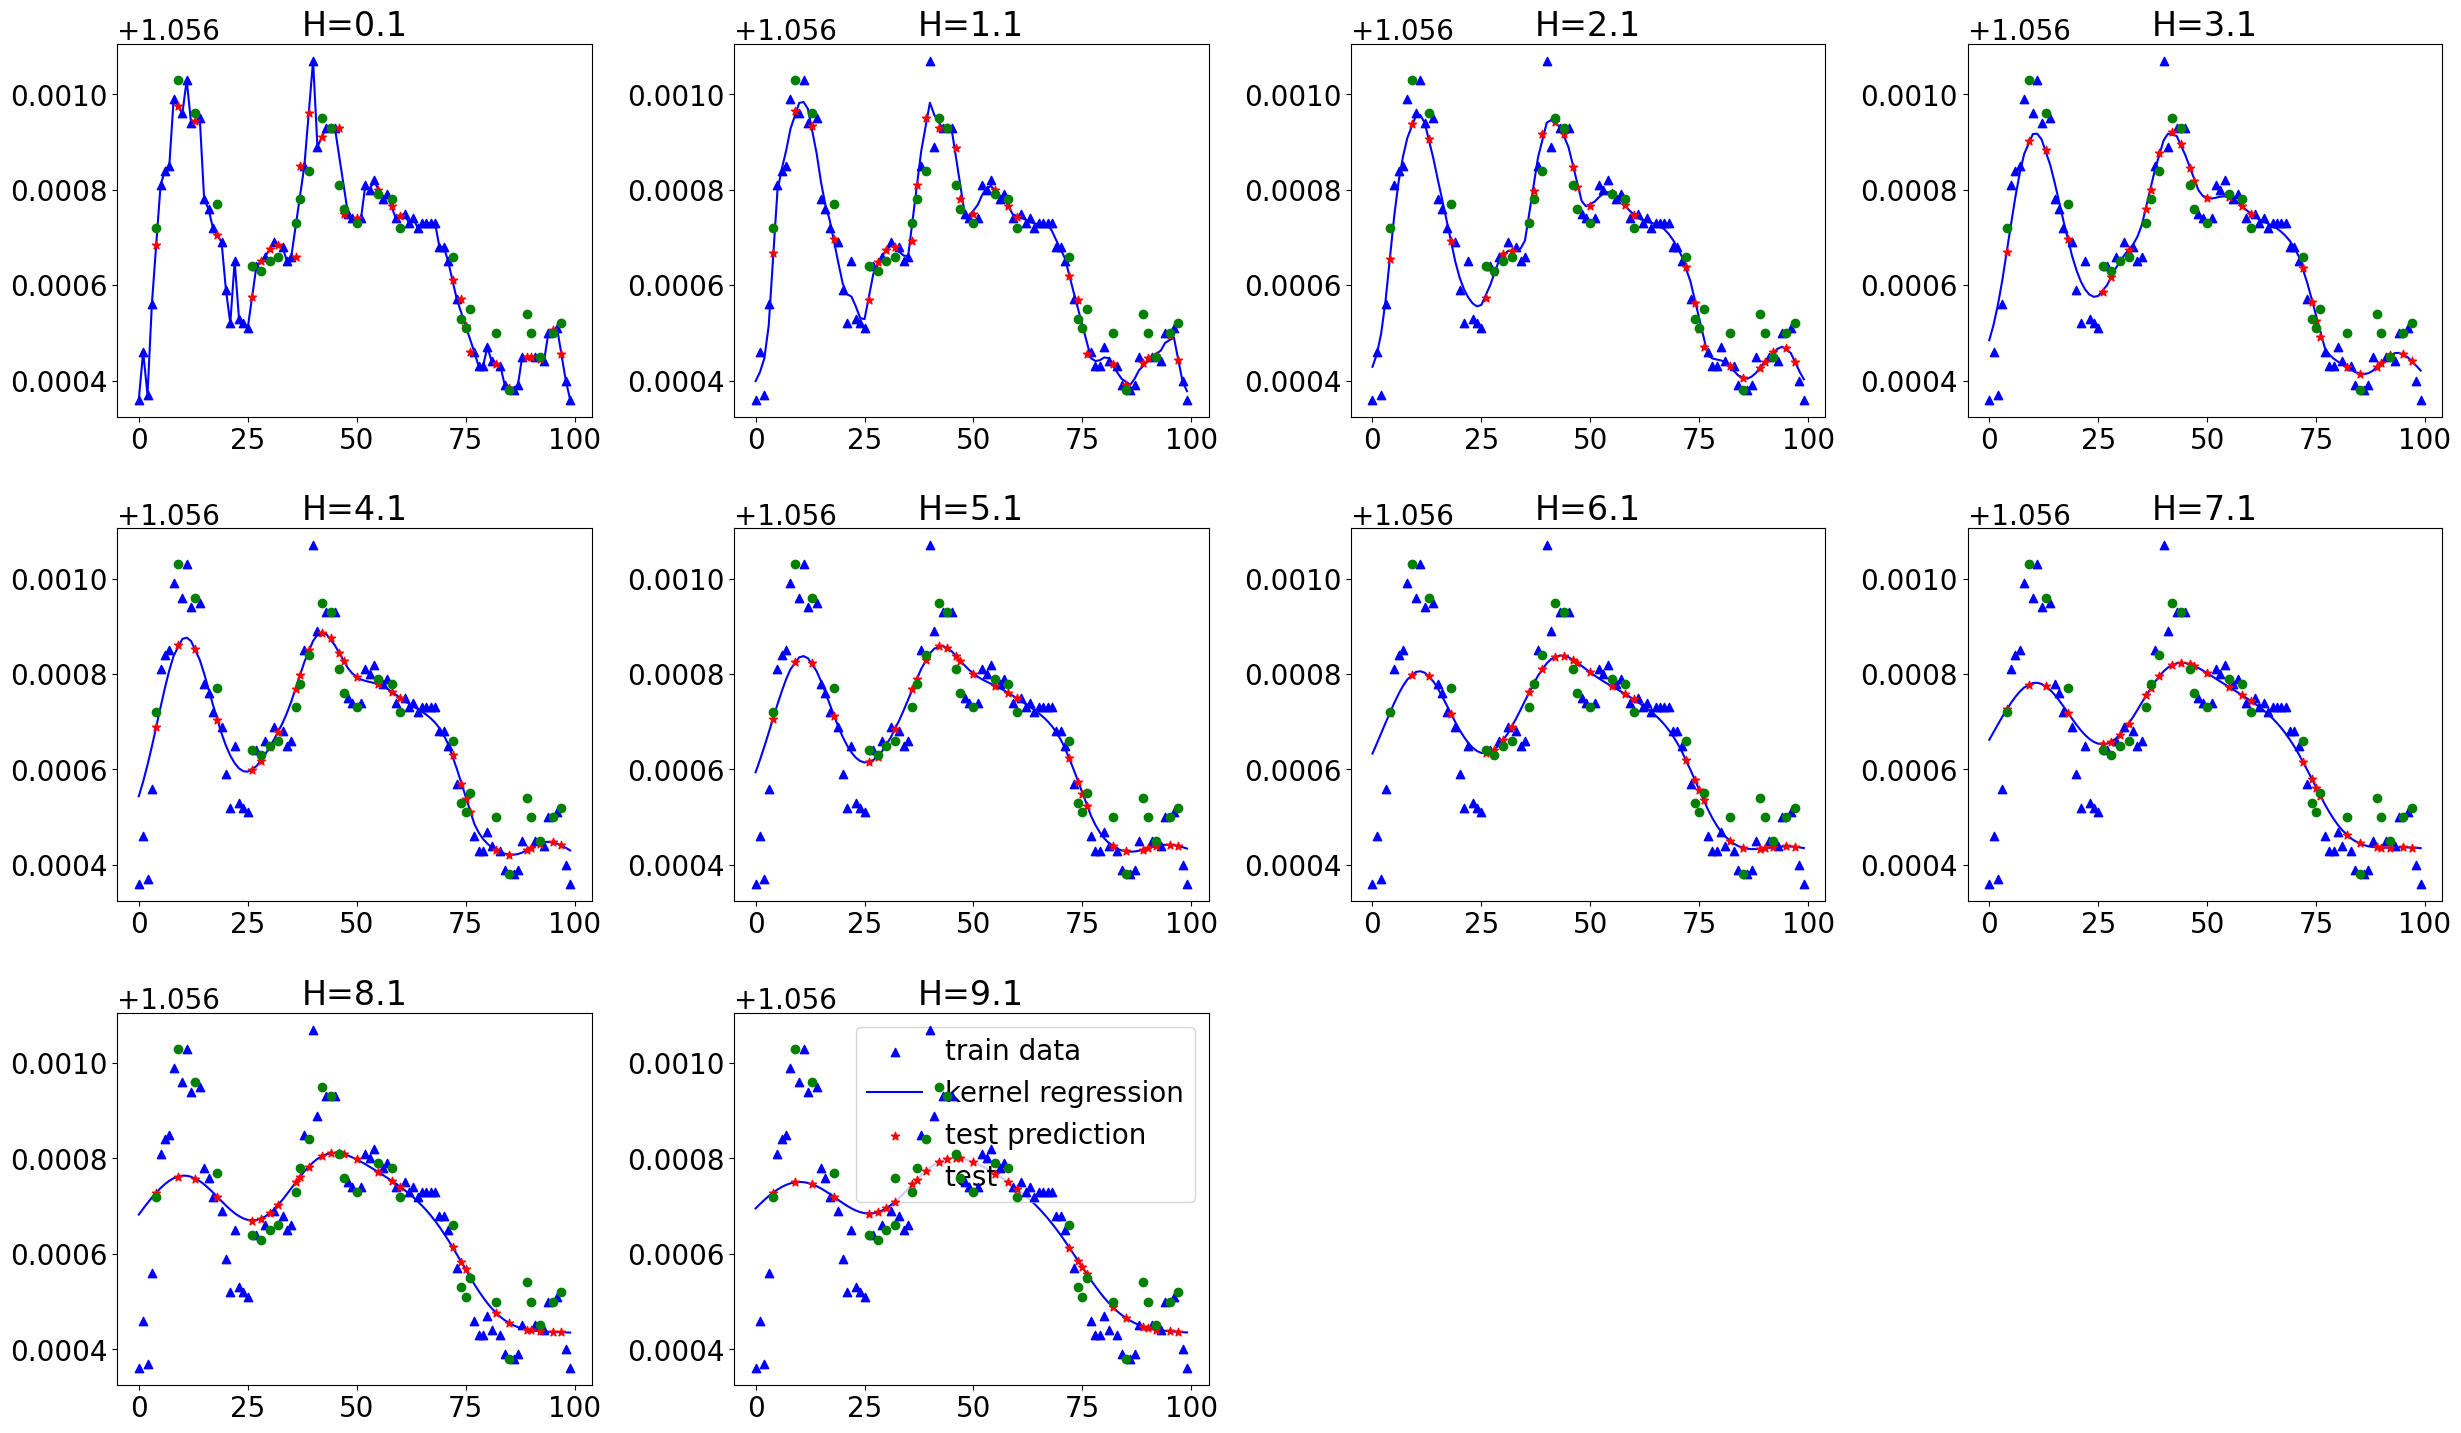

EpanechnikovKernel
H=0.1 -> MSE:2.687651700680157e-08
H=1.1 -> MSE:3.6842637433036543e-09
H=2.1 -> MSE:2.6966424168842777e-09
H=3.1 -> MSE:2.6334891483098317e-09
H=4.1 -> MSE:2.7072600376408906e-09
H=5.1 -> MSE:2.6399519810994176e-09
H=6.1 -> MSE:2.6259358066836512e-09
H=7.1 -> MSE:2.832334689812642e-09
H=8.1 -> MSE:3.2703088285030963e-09
H=9.1 -> MSE:3.818588826635389e-09


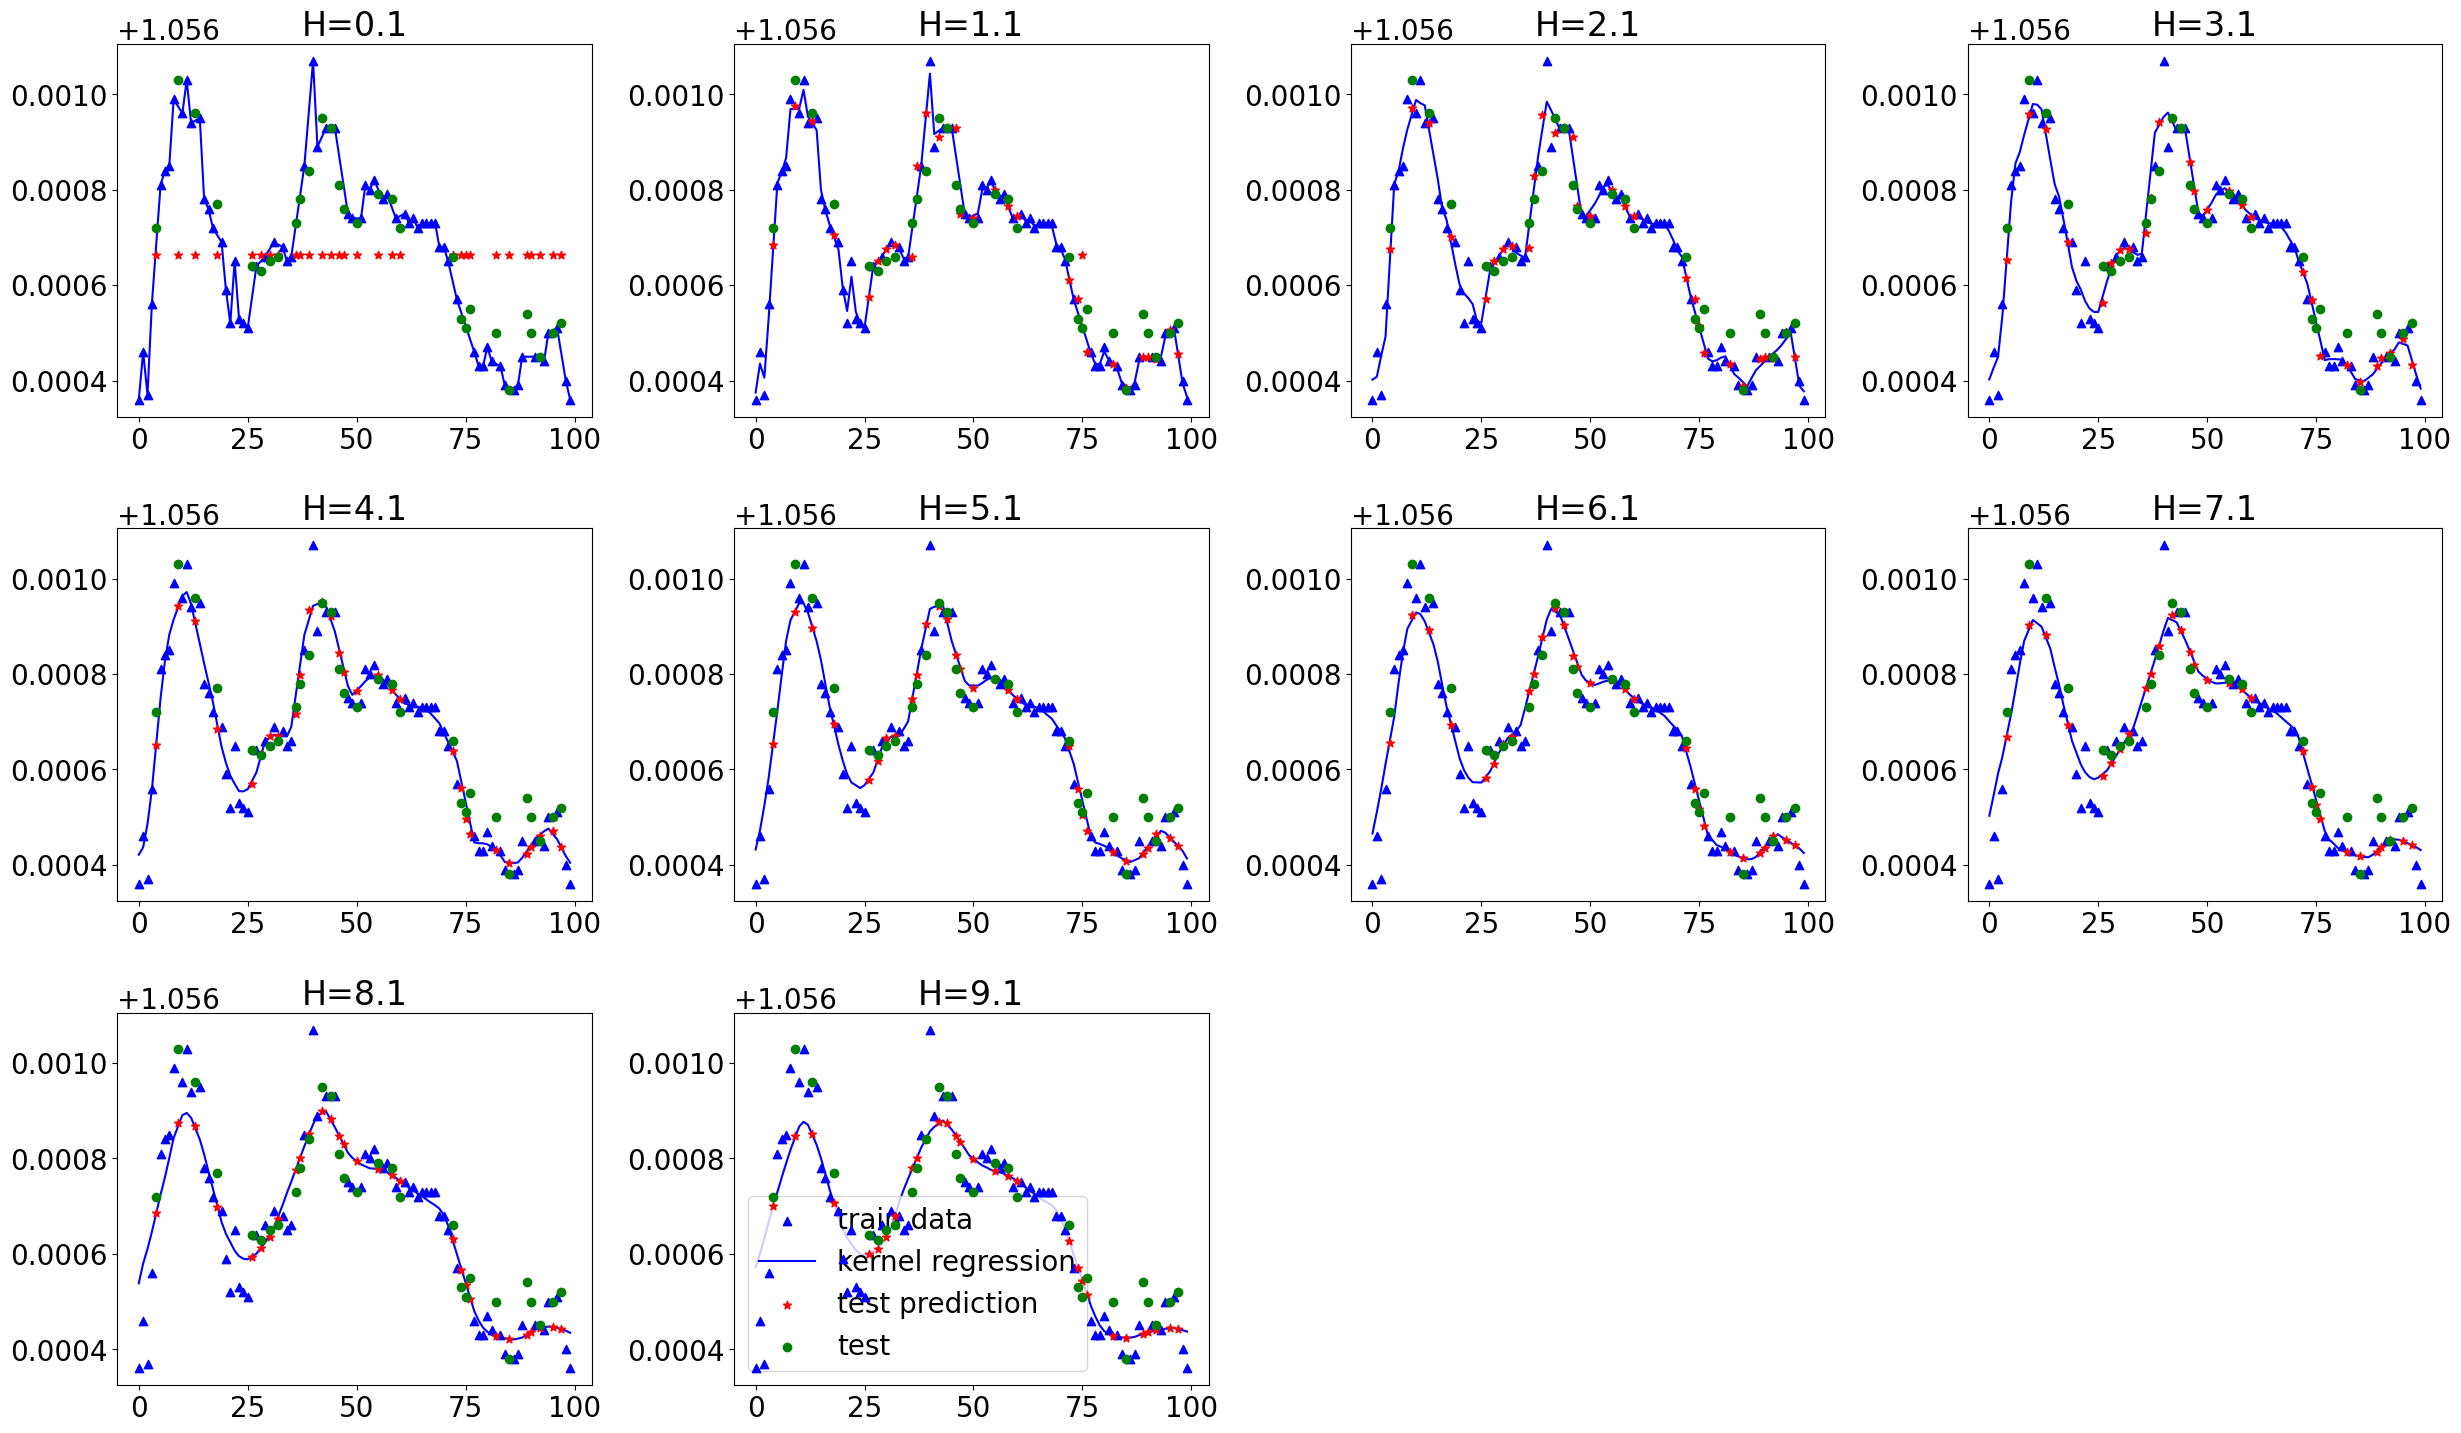

SquaredExponentialKernel
H=0.1 -> MSE:2.9091666666669614e-09
H=1.1 -> MSE:2.581479991944495e-09
H=2.1 -> MSE:2.5336012270559243e-09
H=3.1 -> MSE:2.7771206980357164e-09
H=4.1 -> MSE:3.467813247097434e-09
H=5.1 -> MSE:4.344232772745528e-09
H=6.1 -> MSE:5.238987980930821e-09
H=7.1 -> MSE:6.106862564510593e-09
H=8.1 -> MSE:6.926777574623912e-09
H=9.1 -> MSE:7.67554823938062e-09


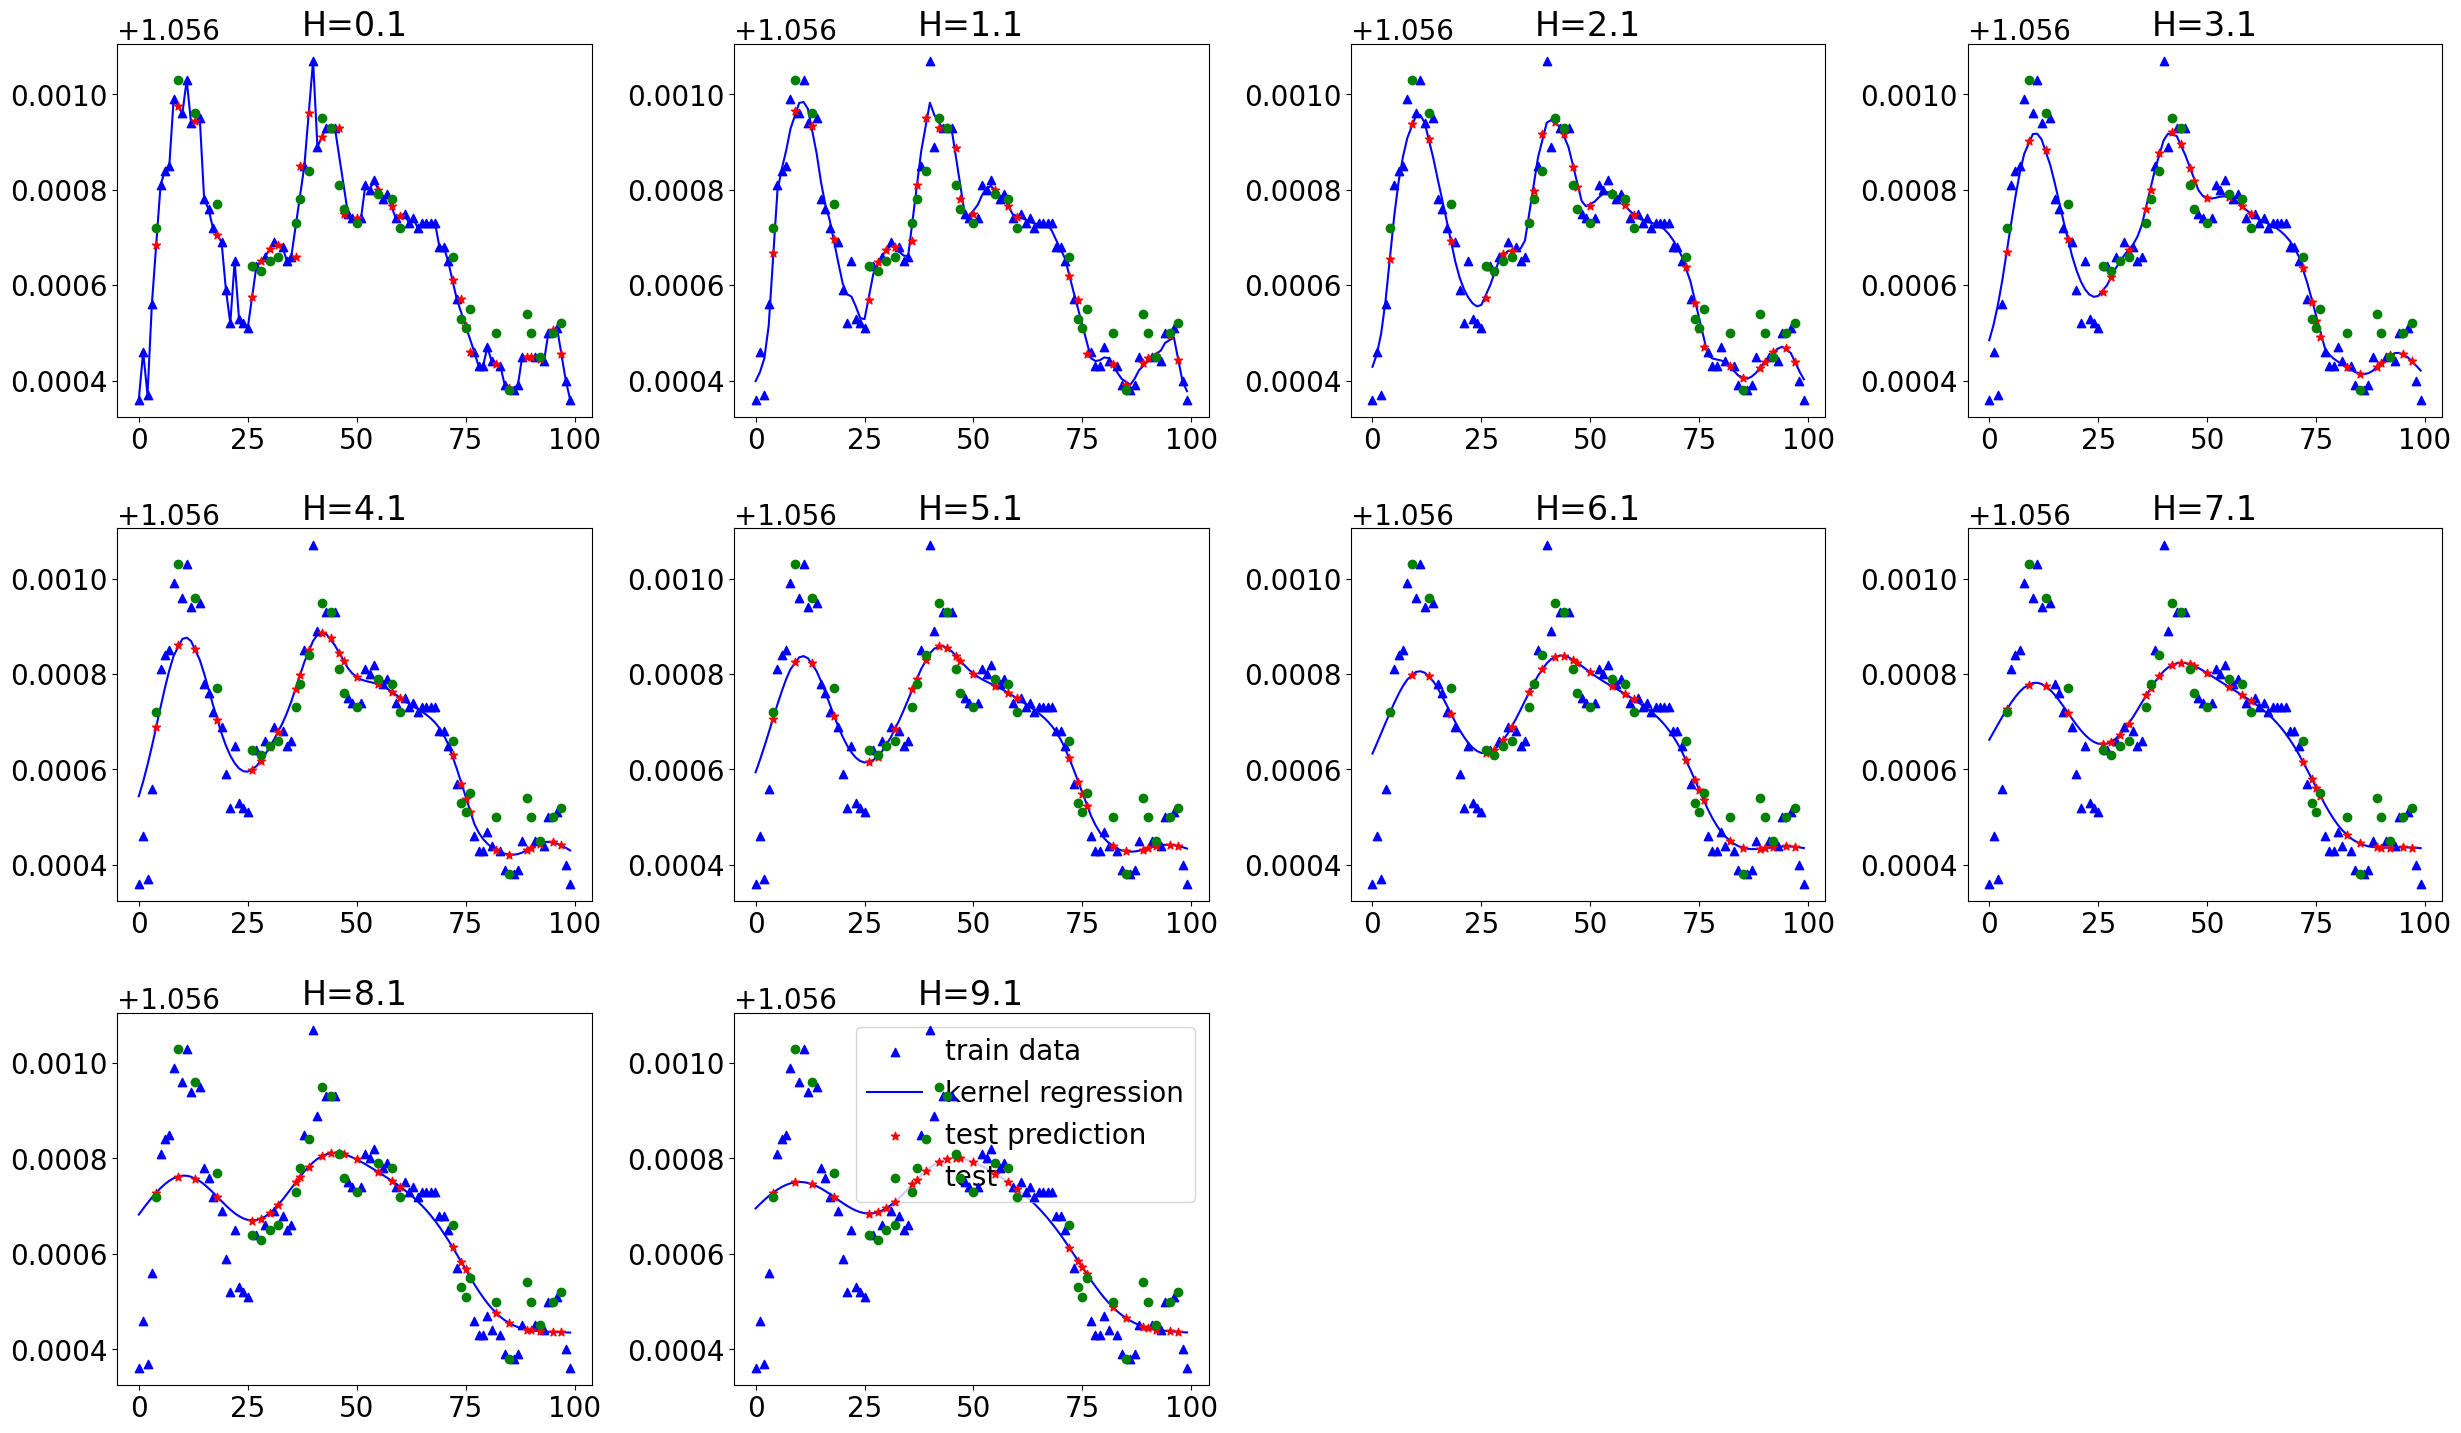

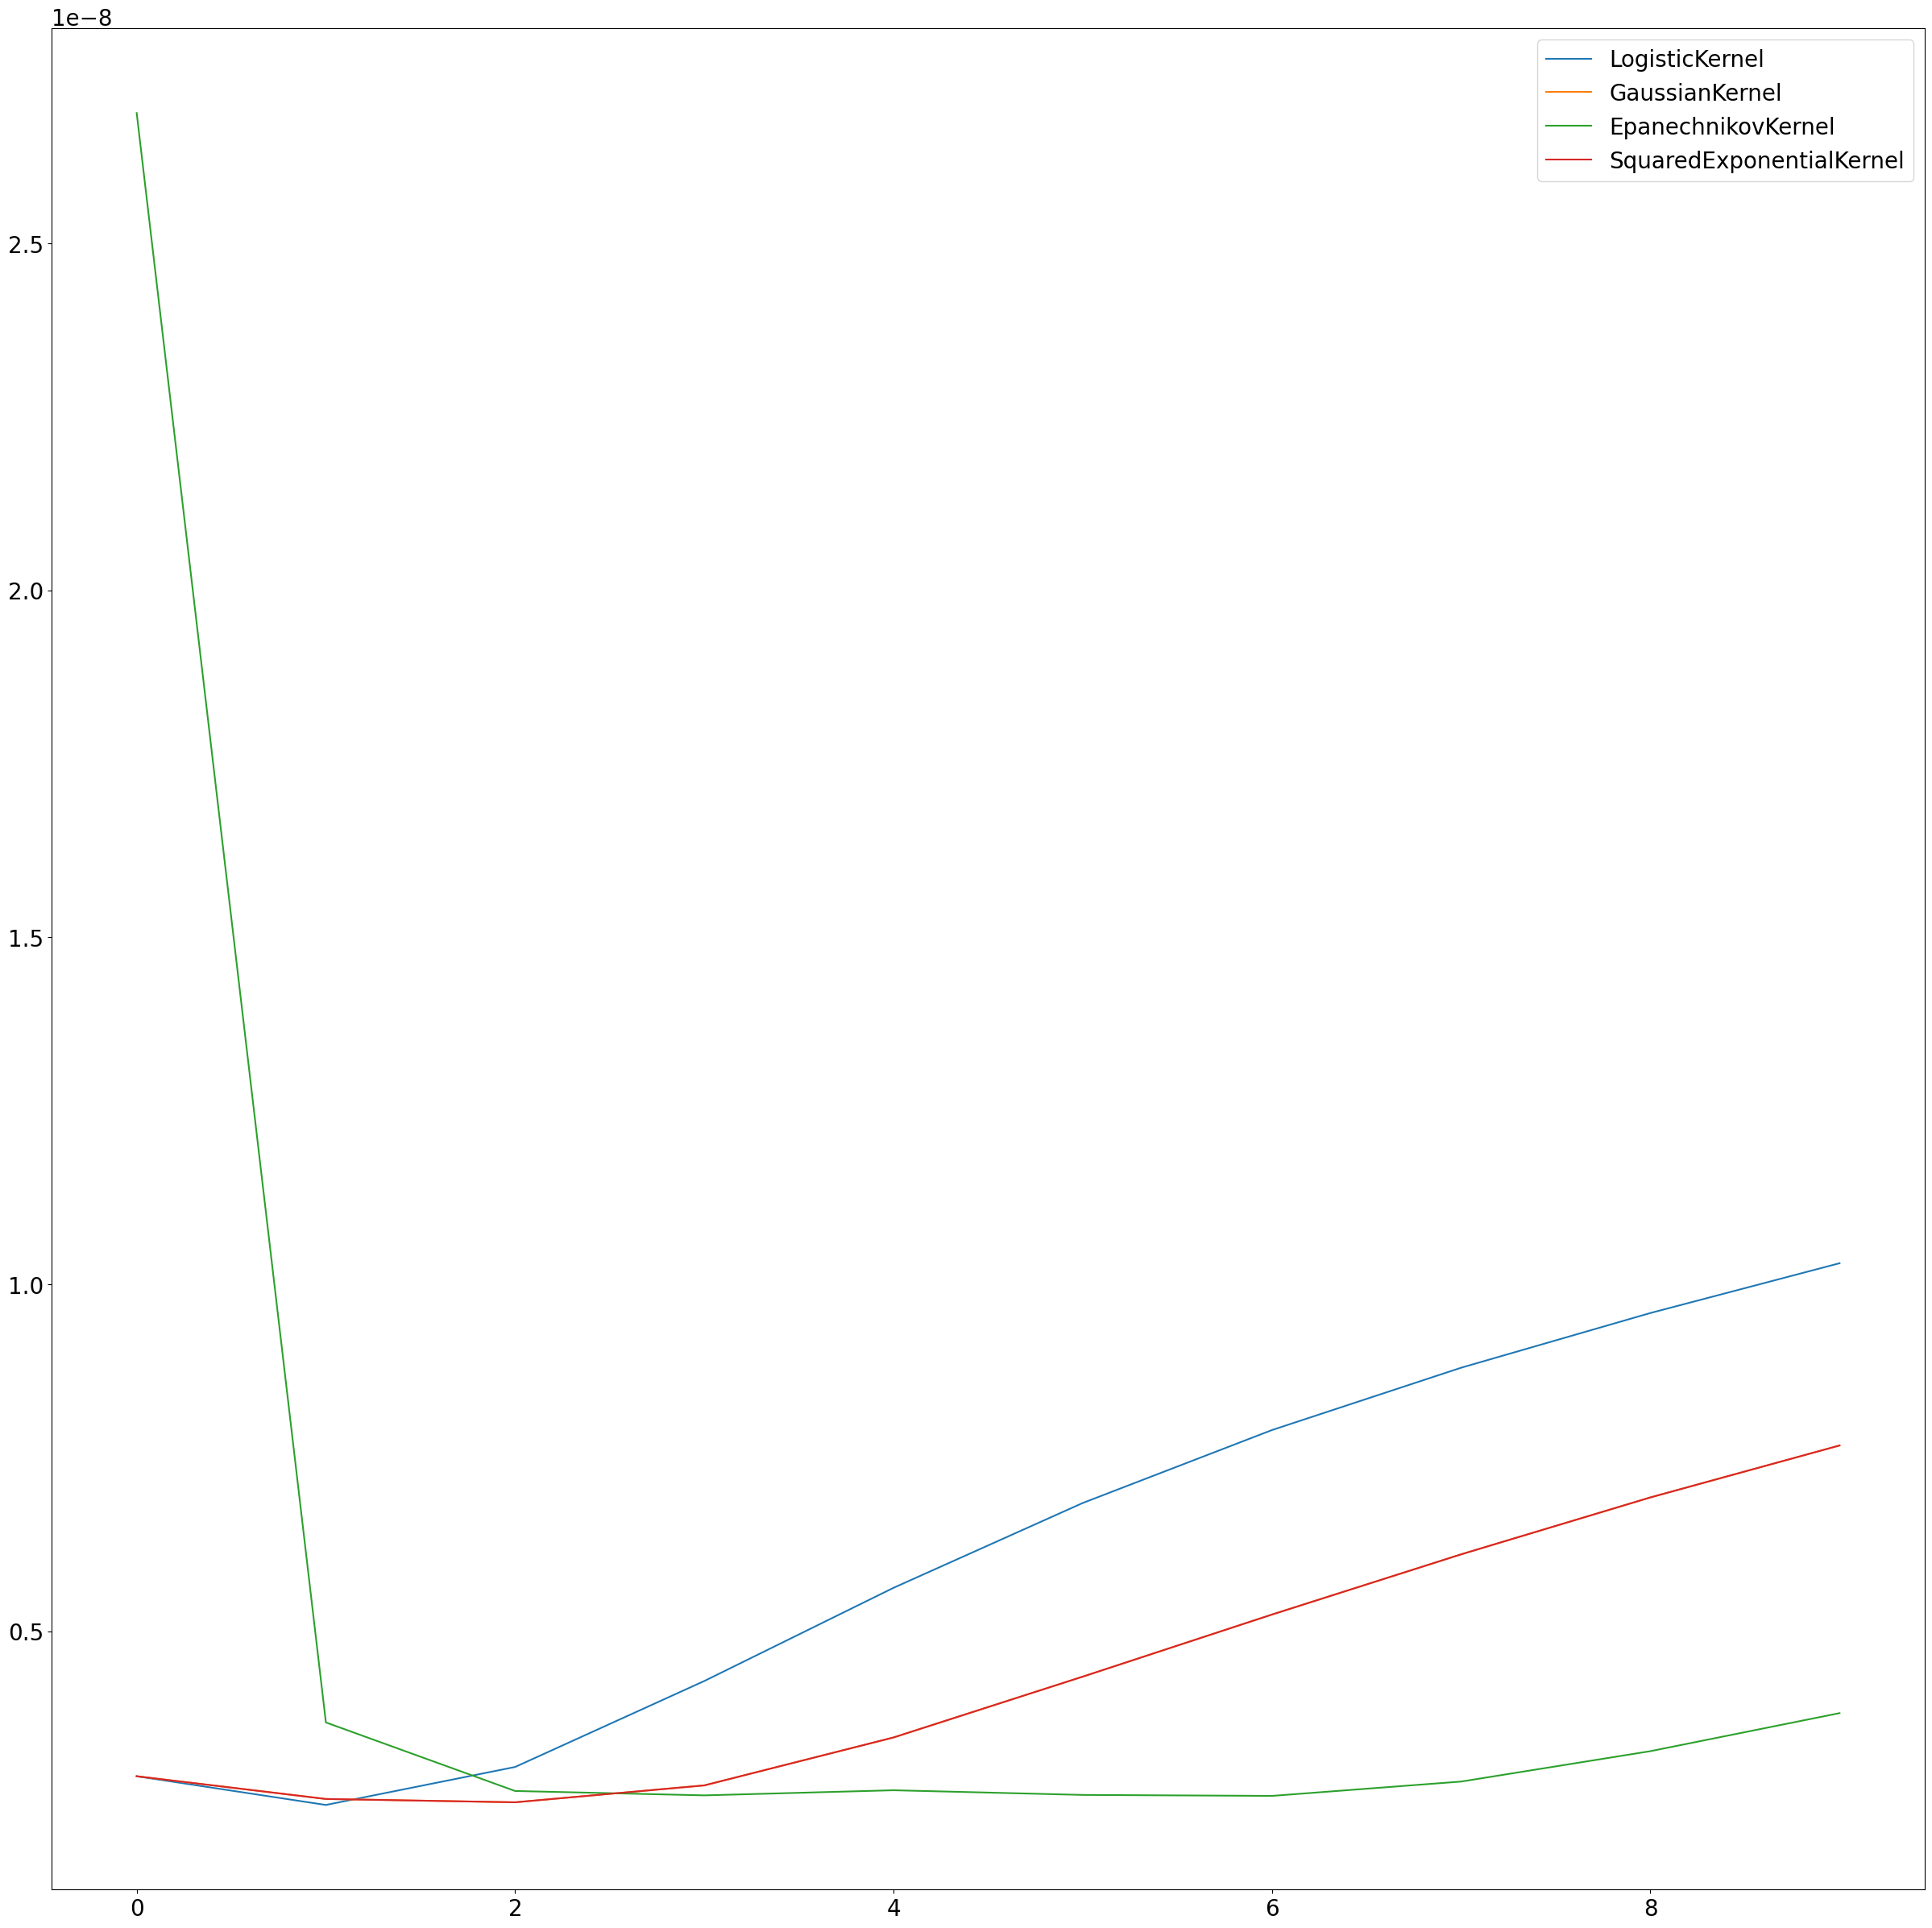

In [6]:
dataNum = 100
x,y = forexHis(dataNum)
x, xTest, y, yTest = train_test_split(x, y, test_size=.3)
indices = np.argsort(x)
x = x[indices]
y = y[indices]


kernels = [LogisticKernel(), GaussianKernel(), EpanechnikovKernel(), SquaredExponentialKernel()]

Hs = 100
Step = 10

ACC_HIST =[]


for kernel in kernels:
    print(type(kernel).__name__)
    plt.rcParams.update({'font.size': 20})
    plt.rcParams['figure.figsize'] = (30, 30)
    index = 0
    for i in range(1, Hs, Step):
        index += 1
        kr = KernelRegression(xTrain=x, yTrain=y, xTest=xTest, yTest=yTest, H=i/10, kernel=kernel.kernel_function)
        e1=kr.fit()
        e2=kr.predict()
        plt.subplot(5, 4, index)
        plt.title(f"H={i/10}")
        plt.scatter(x, y, marker = '^', color='b', label = 'train data', zorder=10)
        plt.plot(x, e1, color='b', label = 'kernel regression', zorder=1)
        plt.scatter(xTest, e2, marker = '*', color='r', label = 'test prediction',zorder=20)
        plt.scatter(xTest, yTest, color='g', label = 'test', zorder=30)
        print(f"H={i/10} -> MSE:{kr.accuracy()}")
        ACC_HIST.append(kr.accuracy())
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.legend()
    plt.show()

l = int(Hs / Step)
for i in range(len(kernels)):
    x = [_ for _ in range(l)]
    plt.plot(x, ACC_HIST[i*l:(i+1)*l], label=f"{type(kernels[i]).__name__}")
plt.legend()
plt.show()
    
        

C:\Users\top\AppData\Local\Temp\ipykernel_5500\2785510346.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('rainbow', len(x_test))


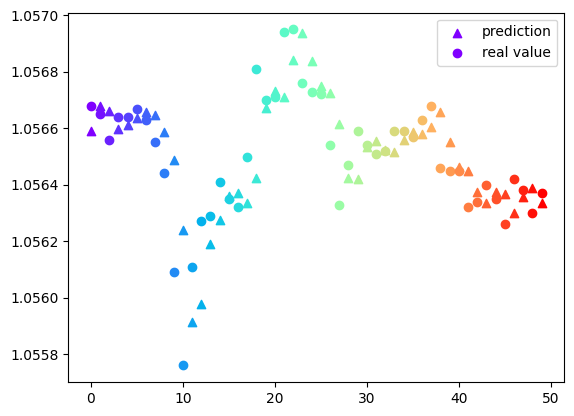

1.3388858336389162e-12


In [59]:
# # Online Learning
dataNum = 200
x,y = forexHis(dataNum)
class KernelRegression_oneTest:
    H = .5
    kernel: Callable
    def __init__(self, H, kernel) -> None:
        self.H = H
        self.kernel = kernel.kernel_function
    def predict(self, x, y, X_test):
        return self.predict_(x, y, X_test)
    def predict_(self, x, y, x_test):
        denominator = [self.kernel(self.H, x[i], x_test) for i in range(len(x))]
        numerator = sum([denominator[i] * y[i] for i in range(len(x))])
        return numerator/sum(denominator)

x = x.tolist()
y = y.tolist()
x_data, y_data = x[150:], y[150:]
x_test, y_test = x[:50], y[:50]

color_palette = plt.cm.get_cmap('rainbow', len(x_test))
errors = []
for i in range(len(x_test)):
    color = color_palette(i)
    kr = KernelRegression_oneTest(3.1, EpanechnikovKernel())
    E = kr.predict(x_data, y_data, x_test[i])
    x_data.append(x_test[i])
    y_data.append(y_test[i])
    plt.scatter(x_test[i], E,marker='^', color=color, label='prediction')
    plt.scatter(x_test[i], y_test[i], marker='o', color=color, label='real value') 
    errors.append(mean_squared_error([y_test[i]], [E]))
plt.legend([f'{i}' for i in ['prediction', 'real value']])
plt.show()
print(np.power(np.sum(errors),2))